## Similarity of preferred emojis across languages

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
import pickle
print('Default backend: ' + matplotlib.get_backend()) 
#matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())
#sns.set()

path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"
#Existing emojis
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
#Emoji codes
emojisdf = pd.read_csv(emojisPath)

Default backend: module://matplotlib_inline.backend_inline


In [31]:
cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender"])
dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender"])

#### Histograms , Rank Plots, Log Log Plot

In [9]:
sns.set()

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

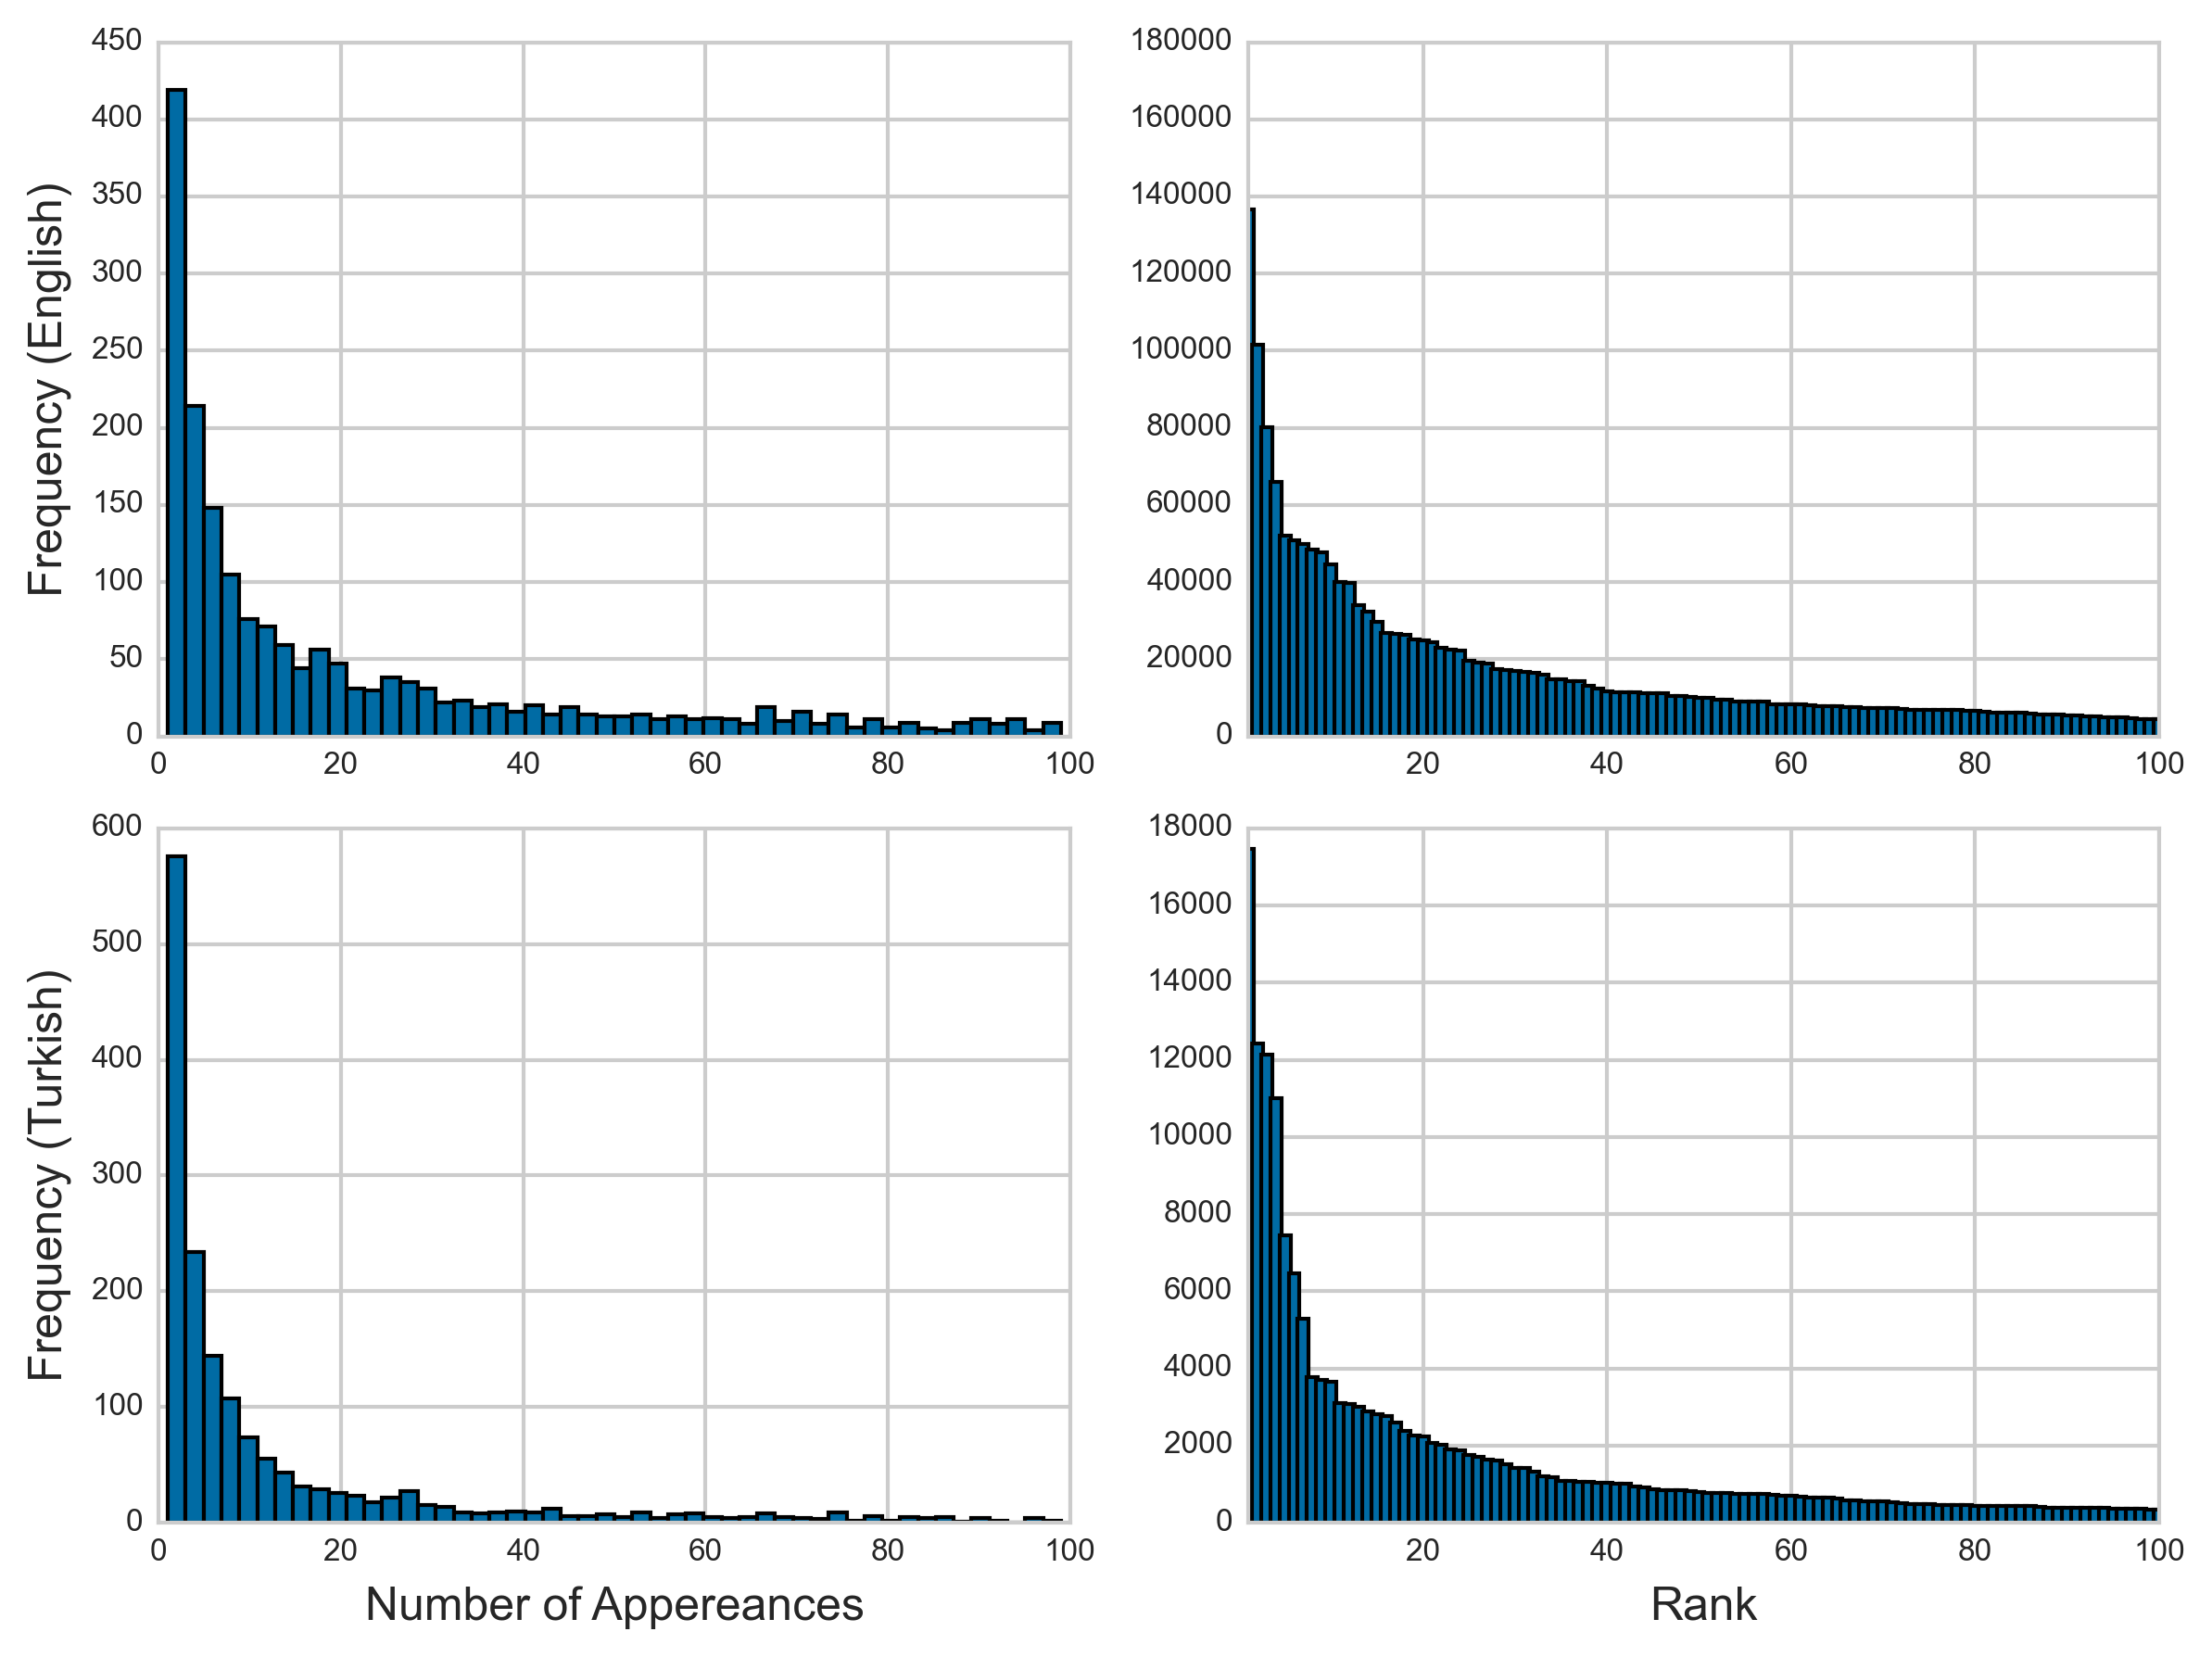

In [28]:
plt.style.use("tableau-colorblind10")
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_dpi(300)
ax[0,0].set_ylabel("Frequency (English)")
ax[0,0].hist(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt<100].cnt,bins=50)
ax[0,0].set_xlim(0,100)

dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[0,1].set_xlim([1,100])
ax[0,1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,width=1.2)

ax[1,0].set_ylabel("Frequency (Turkish)")
ax[1,0].hist(groupsAndCountsDfTr[groupsAndCountsDfTr.cnt<100].cnt,bins=50)
ax[1,0].set_xlabel("Number of Appereances")
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[1,0].set_xlim([0,100])
ax[1,1].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt,width=1.2)
ax[1,1].set_xlabel("Rank")
ax[1,1].set_xlim([1,100])
plt.tight_layout()
#sns.set_style("white")
matplotlib.rcParams.update({'font.size': 8})
#ax[0,0].grid(True)
#ax[1,0].grid(True)
#ax[0,1].grid(True)
#ax[1,1].grid(True)

plt.show()

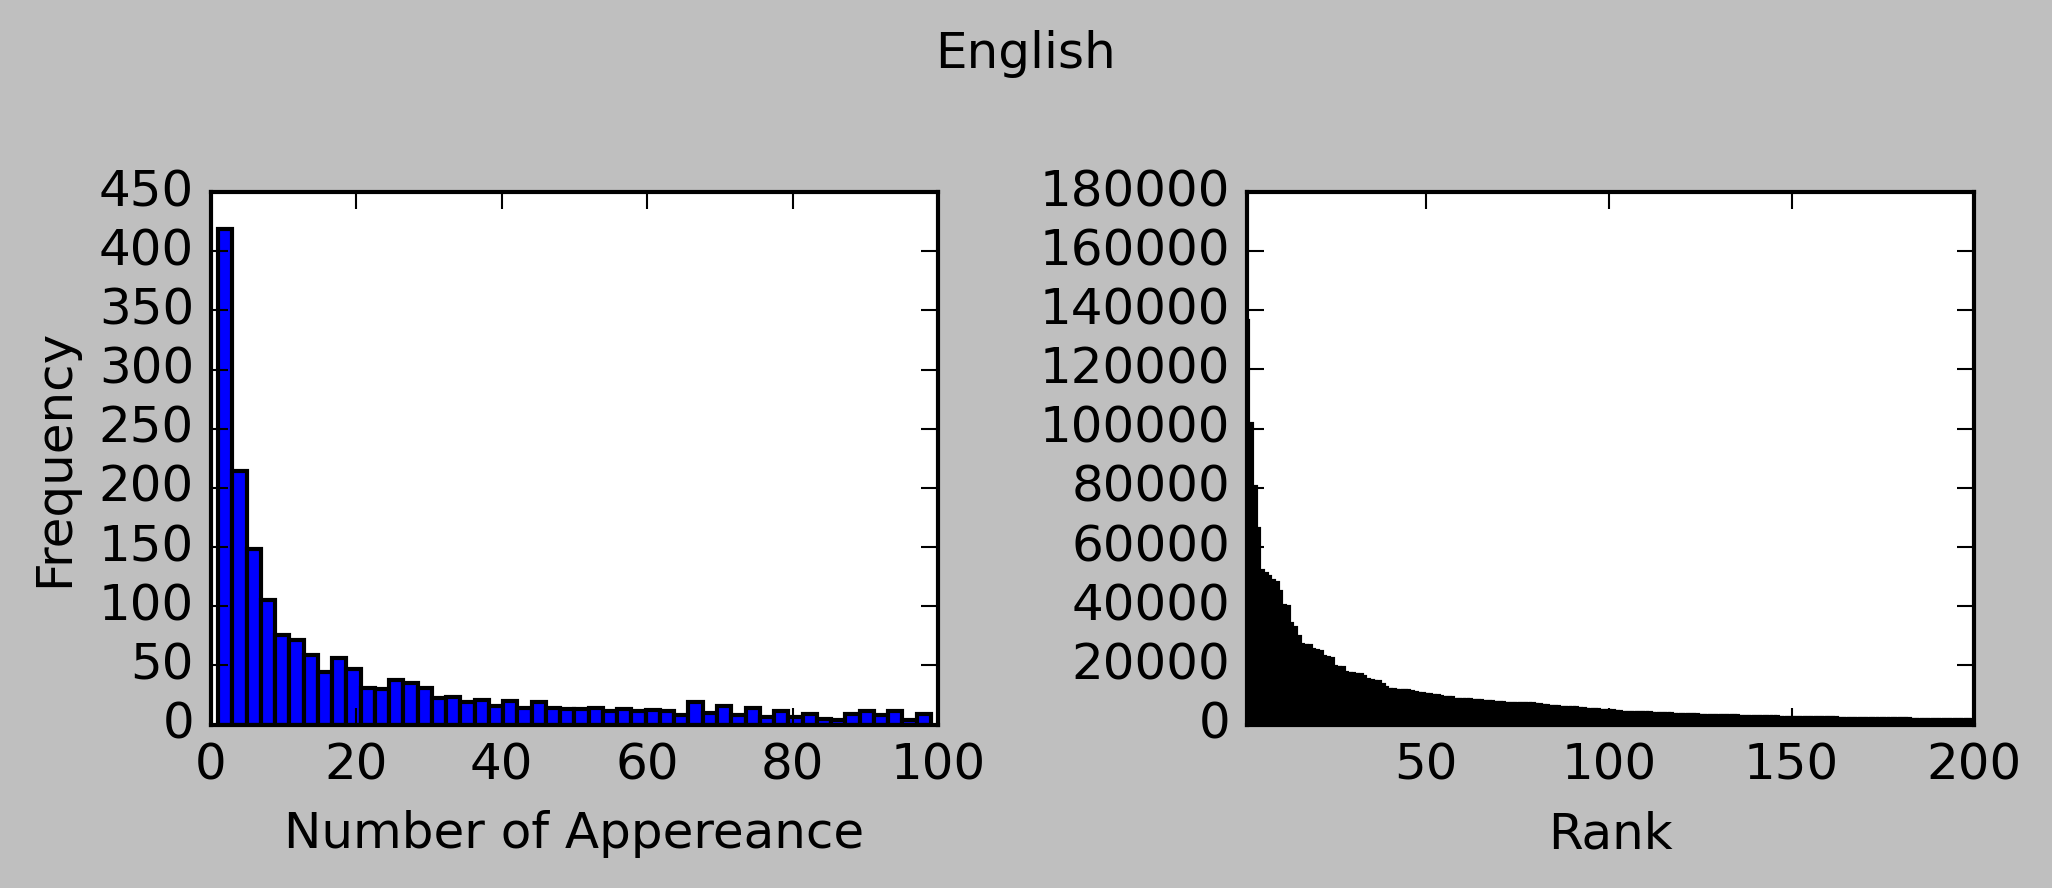

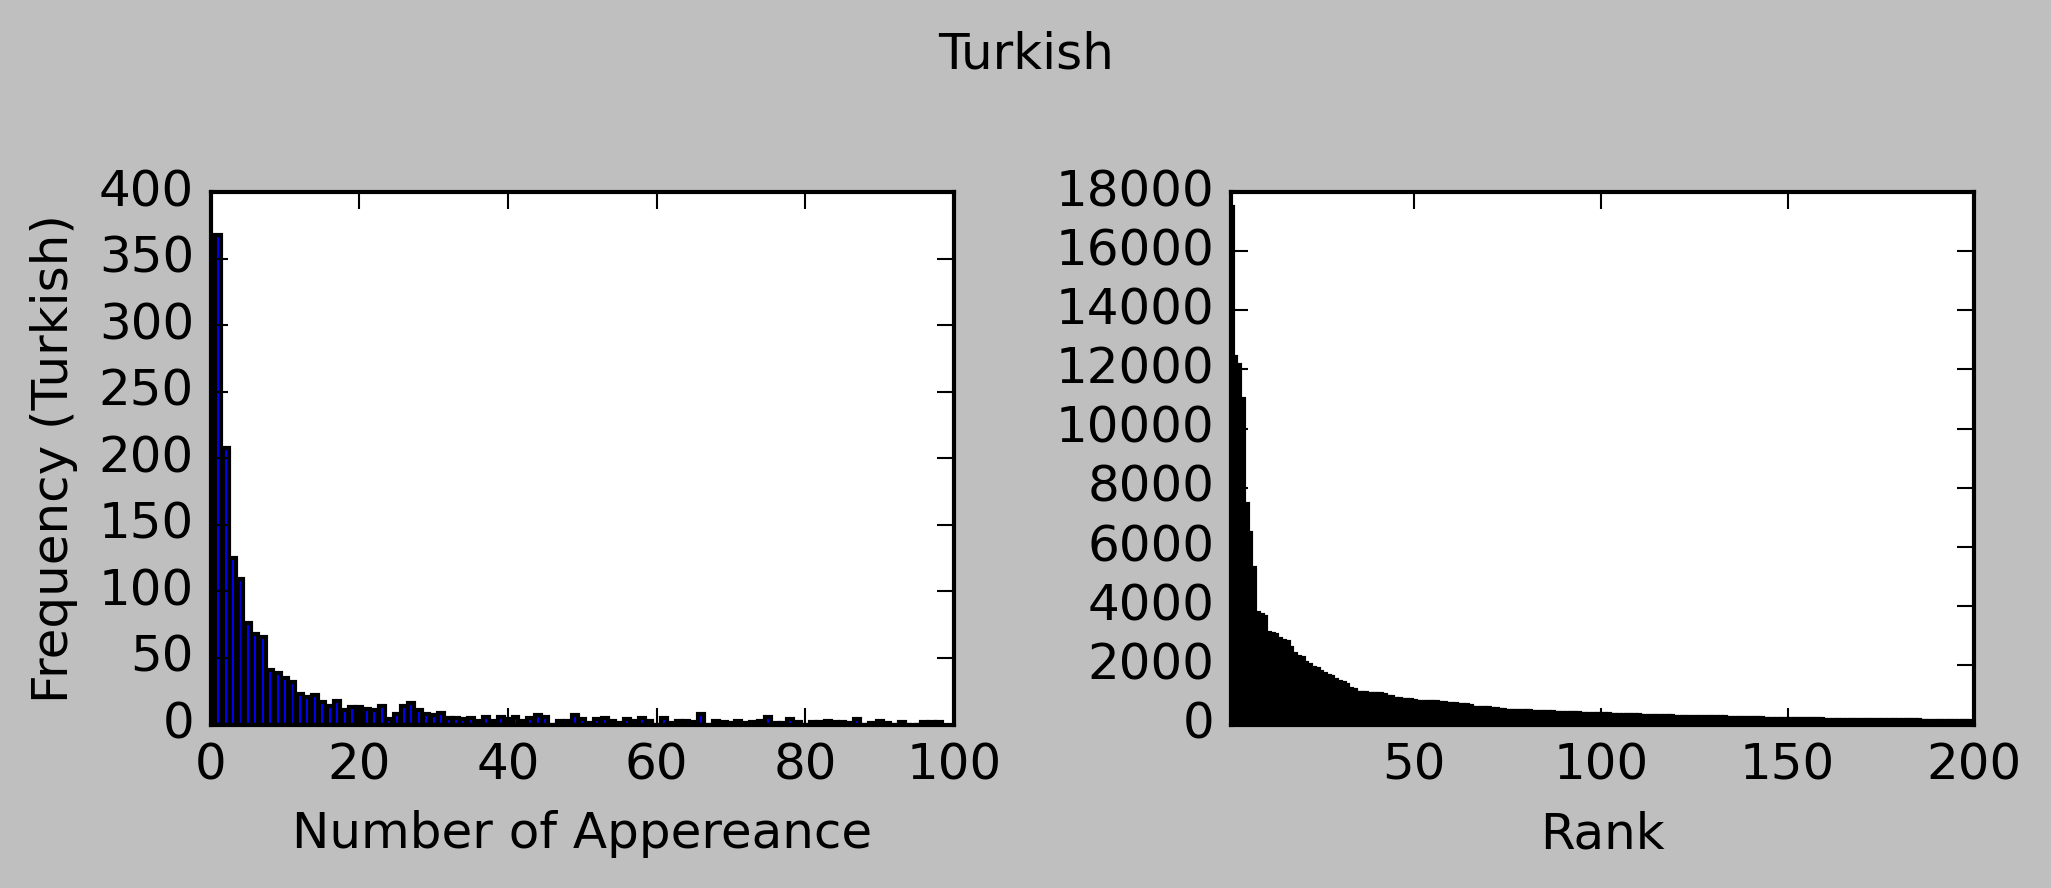

In [11]:
plt.style.use('classic')
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
fig.suptitle('English')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([0,100])
#ax[0].bar(x=histEn[1][:-1],height=histEn[0])
#ax[0].set_title('English')
ax[0].set_ylabel('Frequency')
ax[0].hist(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt<100].cnt,bins=50)
ax[0].set_xlabel('Number of Appereance')
#ax[0].grid(axis='y')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[1].set_xlim([1,200])
ax[1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt)
#ax[1].set_title('English')
#ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Rank')
#ax[1].grid(axis='y')
#plt.style.use('fast')
plt.tight_layout()
#sns.set_style('dark')
#sns.set()
plt.show()


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
fig.suptitle('Turkish')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
histTr = np.histogram(groupsAndCountsDfTr.cnt,bins=list(range(1,100)))
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([0,100])
ax[0].bar(x=histTr[1][:-1],height=histTr[0])
#ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency (Turkish)')
ax[0].set_xlabel('Number of Appereance')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[1].set_xlim([1,200])
ax[1].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt)
#ax[1].set_title('Turkish')
#ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Rank')

plt.tight_layout()

#sns.set_style('whitegrid')
#sns.set()
plt.show()

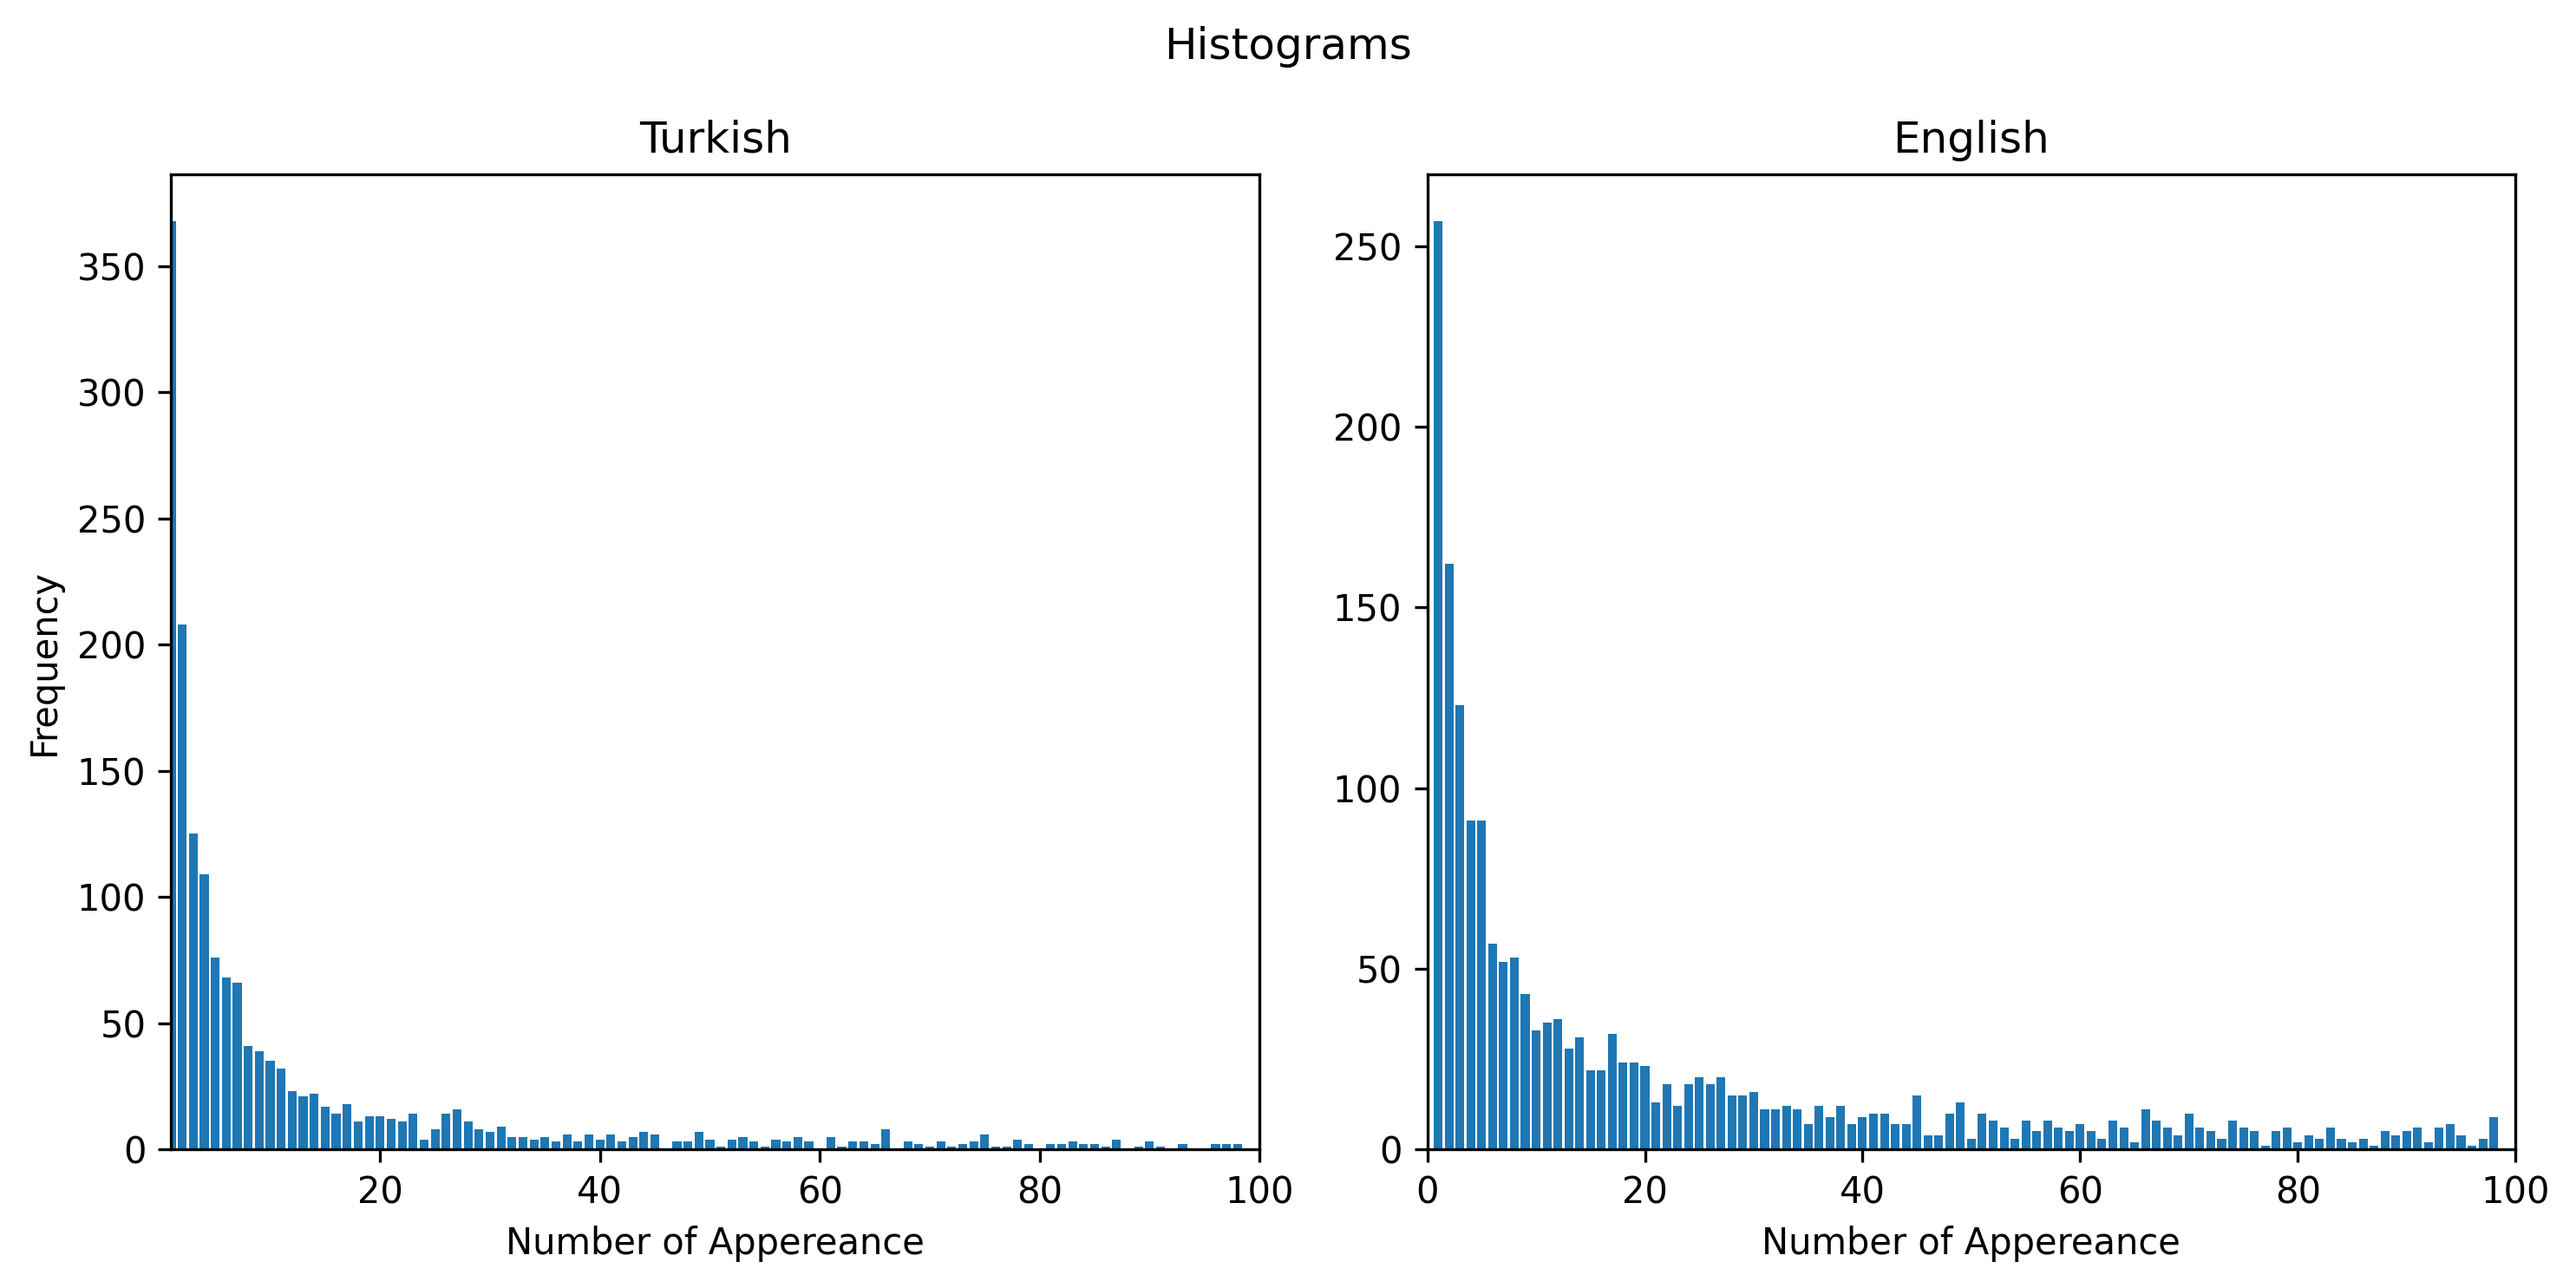

In [33]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),)
fig.suptitle('Histograms')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
histTr = np.histogram(groupsAndCountsDfTr.cnt,bins=list(range(1,100)))
histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([1,100])
ax[0].bar(x=histTr[1][:-1],height=histTr[0])
ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Number of Appereance')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
ax[1].bar(x=histEn[1][:-1],height=histEn[0])
ax[1].set_title('English')
ax[1].set_xlabel('Number of Appereance')
ax[1].set_xlim([0,100])
plt.style.use('fast')
plt.tight_layout()

#sns.set_style('dark')
#sns.set()
plt.show()

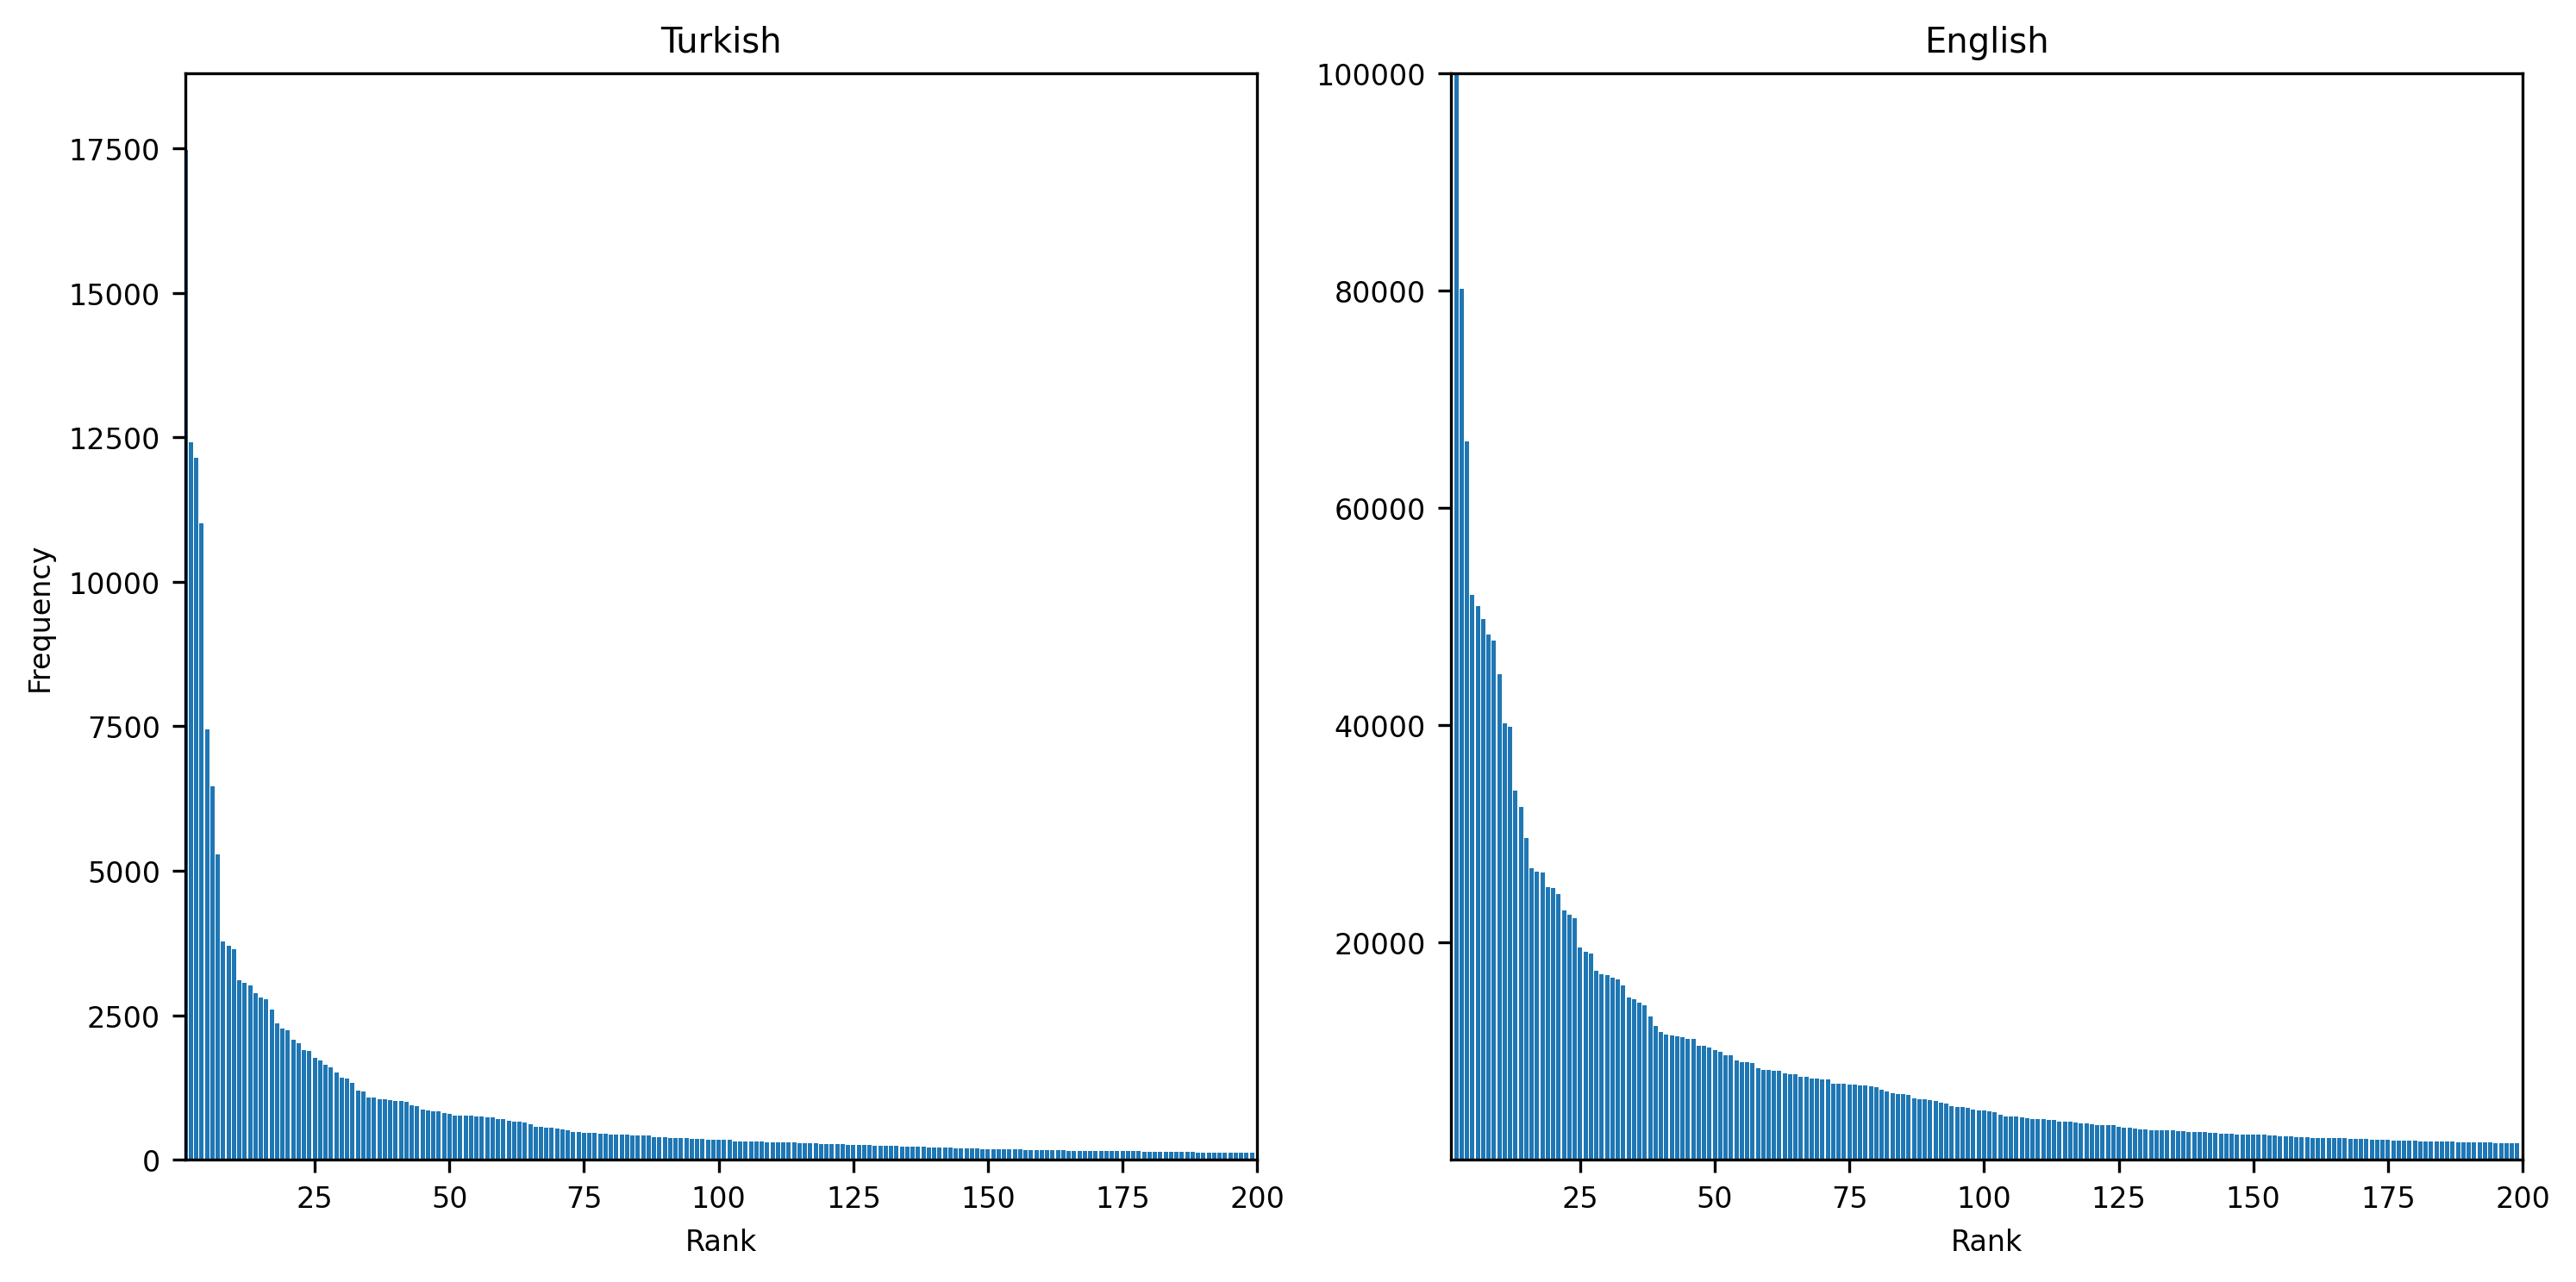

In [5]:
#Rank plot

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
#plt.style.use('seaborn-whitegrid')
fig.set_dpi(300)
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[0].set_xlim([1,200])
ax[0].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt)
ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rank')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[1].set_xlim([1,200])
ax[1].set_ylim([1,100000])
ax[1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt)
ax[1].set_title('English')
ax[1].set_xlabel('Rank')
plt.tight_layout()
plt.show()


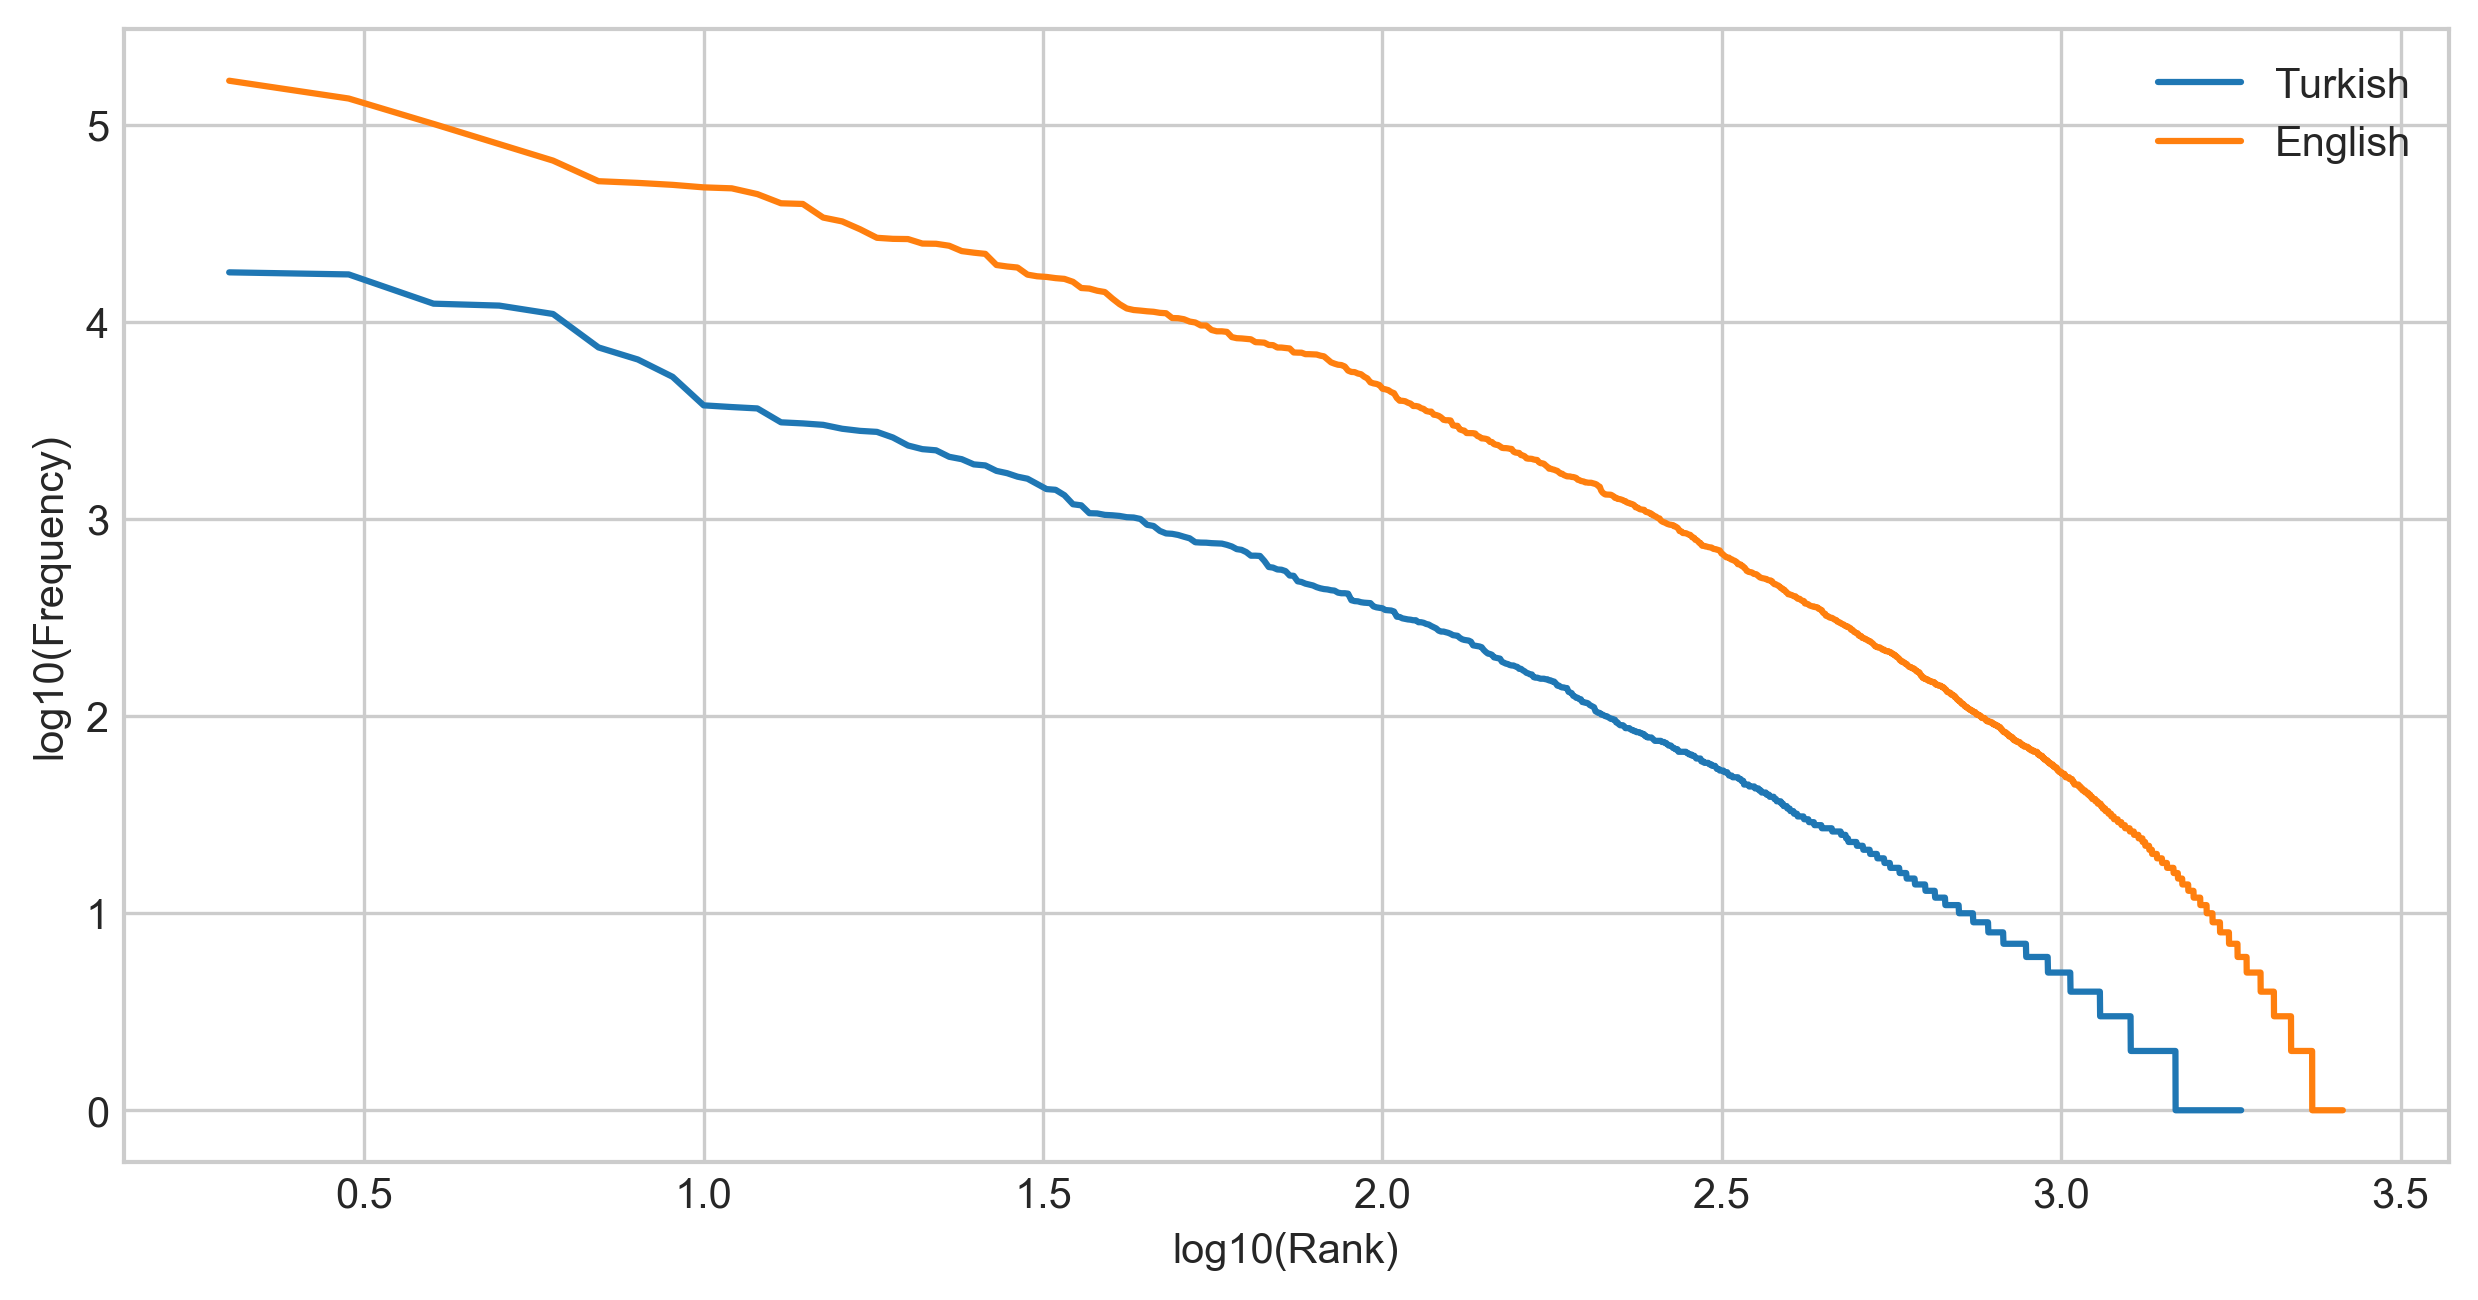

In [5]:

plt.style.use('seaborn-whitegrid')
dataCountsTr = groupsAndCountsDfTr
dataCountsEn = groupsAndCountsDfEn
plt.figure(figsize=(10,5),dpi=300)
dataCountsTr.index = dataCountsTr.index+1
dataCountsEn.index = dataCountsEn.index+1

plt.plot(np.log10(dataCountsTr.index),np.log10(dataCountsTr.cnt),label="Turkish")
plt.plot(np.log10(dataCountsEn.index),np.log10(dataCountsEn.cnt),label='English')
plt.xlabel("log10(Rank)")
plt.ylabel('log10(Frequency)')
#plt.title('Distribution of Emoticons by Rank')
plt.legend()
plt.show()

##### Checking for 10-90% pareto like distribution

first part: 10-90%

second : the distribution changes

In [74]:
groupsAndCountsDfTr[groupsAndCountsDfTr.index<191].cnt.sum()/groupsAndCountsDfTr.cnt.sum()

0.8990833123605666

In [72]:
190/(len(groupsAndCountsDfTr)-368)

0.12907608695652173

In [146]:
len(groupsAndCountsDfTr)

1840

In [66]:
len(groupsAndCountsDfTr[groupsAndCountsDfTr.cnt==1])

368

In [89]:
#rest 10%

groupsAndCountsDfTr[(groupsAndCountsDfTr.index >190) & (groupsAndCountsDfTr.index <900)].cnt.sum()/groupsAndCountsDfTr[groupsAndCountsDfTr.index >190].cnt.sum()

0.9018091131963818

In [100]:
(900-190)/len(groupsAndCountsDfTr[groupsAndCountsDfTr.index >190])

0.4295220810647308

90% of the total emoticon usage is created by 20% of the distinct emoticons for Turkish 

In [58]:
groupsAndCountsDfEn[groupsAndCountsDfEn.index<230].cnt.sum()/groupsAndCountsDfEn.cnt.sum()

0.9033678253839935

In [59]:
230/len(groupsAndCountsDfEn)

0.08852963818321787

90% of the total emoticon usage is created by 10% of the distinct emoticons for English , when single counts are removed then it is very close to 90-10

In [63]:
len(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt==1])

257

In [64]:
230/(len(groupsAndCountsDfEn) - 257)

0.09824861170439983

In [104]:
# rest medium popularity


groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230) & (groupsAndCountsDfEn.index<900)].cnt.sum()/groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230)].cnt.sum()

0.8902759499312543

In [105]:

(900-230)/len(groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230)])




0.28258118937157317

In [49]:
print('English total:',len(groupsAndCountsDfEn))
print('Turkish total:',len(groupsAndCountsDfTr))




English total: 2598
Turkish total: 1840


#### Divide Data into phases: 0-200   200 - 1000  1000 - rest

In [6]:
#groupsAndCountsDfTr = groupsAndCountsDfTr.reset_index().drop(columns=['index'])
groupsAndCountsDfTr.index = groupsAndCountsDfTr.index +1

#groupsAndCountsDfEn = groupsAndCountsDfEn.reset_index().drop(columns=['index'])
groupsAndCountsDfEn.index = groupsAndCountsDfEn.index +1


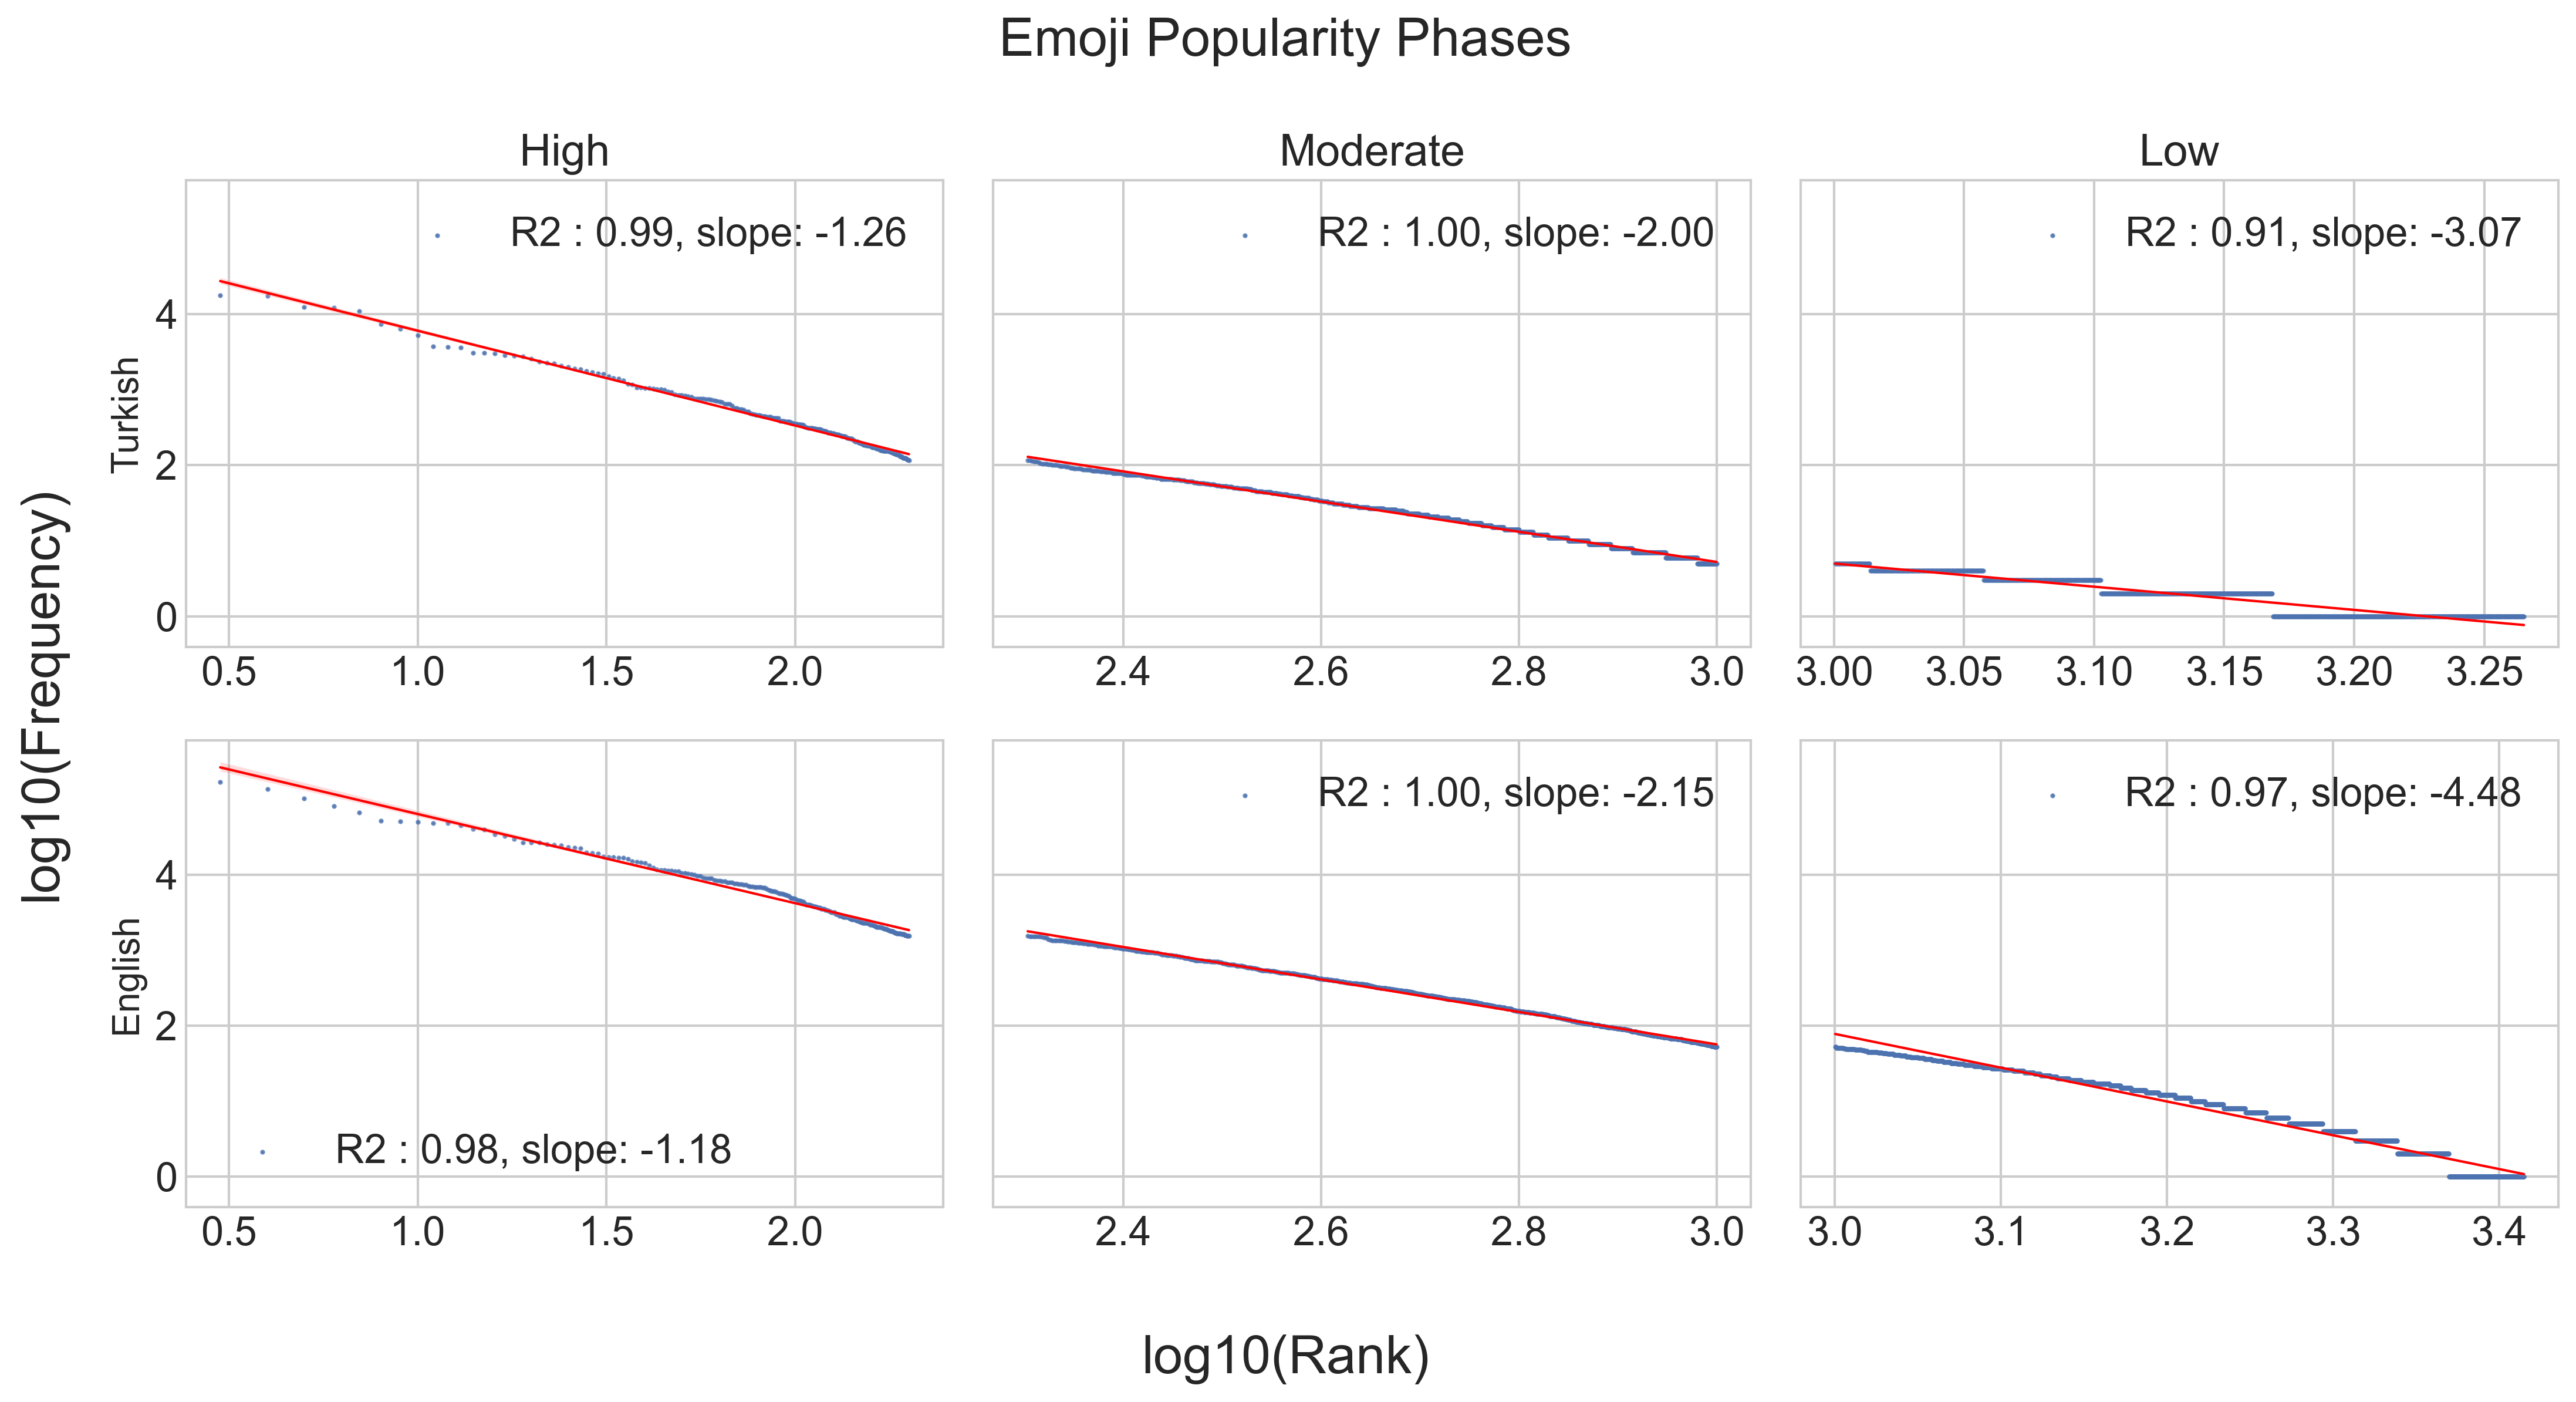

In [32]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('seaborn-whitegrid')

fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8),sharey=True)
fig.set_dpi(300)
fig.supxlabel('log10(Rank)')
fig.supylabel('log10(Frequency)')
fig.suptitle('Emoji Popularity Phases')
#sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})

sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set(font_scale = 1.5)
p1Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<=200]
p2Tr = groupsAndCountsDfTr[(groupsAndCountsDfTr.index>200) & (groupsAndCountsDfTr.index<=1000)]
p3Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index>1000]

p1En = groupsAndCountsDfEn[groupsAndCountsDfEn.index<=200]
p2En = groupsAndCountsDfEn[(groupsAndCountsDfEn.index>200) & (groupsAndCountsDfEn.index<=1000)]
p3En = groupsAndCountsDfEn[groupsAndCountsDfEn.index>1000]

allData = [p1Tr,p2Tr,p3Tr,p1En,p2En,p3En]
outcomes =  []
for i in range(len(allData)):
    mdl = LinearRegression()
    mdl.fit(np.log10(allData[i].index.to_numpy()).reshape(-1,1),np.log10(allData[i].cnt))
    r2 = r2_score(np.log10(allData[i].cnt),mdl.predict(np.log10(allData[i].index.to_numpy()).reshape(-1,1)))
    outcomes.append((r2,mdl.coef_[0]))


plt.style.use('seaborn-whitegrid')

#plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)

#Turkish
sns.regplot(np.log10(p1Tr.index),np.log10(p1Tr.cnt),ax=ax[0,0],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[0][0] , outcomes[0][1]))
sns.regplot(np.log10(p2Tr.index),np.log10(p2Tr.cnt),ax=ax[0,1],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[1][0] , outcomes[1][1]))
sns.regplot(np.log10(p3Tr.index),np.log10(p3Tr.cnt),ax=ax[0,2],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[2][0] , outcomes[2][1]))

#English
sns.regplot(np.log10(p1En.index),np.log10(p1En.cnt),ax=ax[1,0],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[3][0] , outcomes[3][1]))
sns.regplot(np.log10(p2En.index),np.log10(p2En.cnt),ax=ax[1,1],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[4][0] , outcomes[4][1]))
sns.regplot(np.log10(p3En.index),np.log10(p3En.cnt),ax=ax[1,2],scatter_kws={'color': 'b','s':1},line_kws={'color': 'red','lw':1},label='R2 : %0.2f, slope: %0.2f' % (outcomes[5][0] , outcomes[5][1]))

ax[0,0].set_ylabel('Turkish',size=15)
ax[0,1].set_ylabel('')
ax[0,2].set_ylabel('')
ax[1,0].set_ylabel('English',size=15)
ax[1,1].set_ylabel('')
ax[1,2].set_ylabel('')

ax[0,0].set_title('High')
ax[0,1].set_title('Moderate')
ax[0,2].set_title('Low')

for i in range(0,2):
    for j in range(0,3):
        ax[i,j].legend()


plt.tight_layout()
#plt.legend()
plt.show()


##### categories of emoticons as popularity 

In [71]:

groupsAndCountsDfTr.loc[groupsAndCountsDfTr.index<=200,'popularity'] = 'high'
groupsAndCountsDfTr.loc[(groupsAndCountsDfTr.index>200) & (groupsAndCountsDfTr.index<=1000),'popularity'] = 'mod'
groupsAndCountsDfTr.loc[groupsAndCountsDfTr.index>1000,'popularity'] = 'low'
groupsAndCountsDfTr['lang'] = 'Turkish'

groupsAndCountsDfEn.loc[groupsAndCountsDfEn.index<=200,'popularity'] = 'high'
groupsAndCountsDfEn.loc[(groupsAndCountsDfEn.index>200) & (groupsAndCountsDfEn.index<=1000),'popularity'] = 'mod'
groupsAndCountsDfEn.loc[groupsAndCountsDfEn.index>1000,'popularity'] = 'low'
groupsAndCountsDfEn['lang'] = 'English'


In [72]:
dfAll = groupsAndCountsDfTr.append(groupsAndCountsDfEn)
dfAll['logpop'] = np.log(dfAll.cnt)

<Figure size 3000x2400 with 0 Axes>

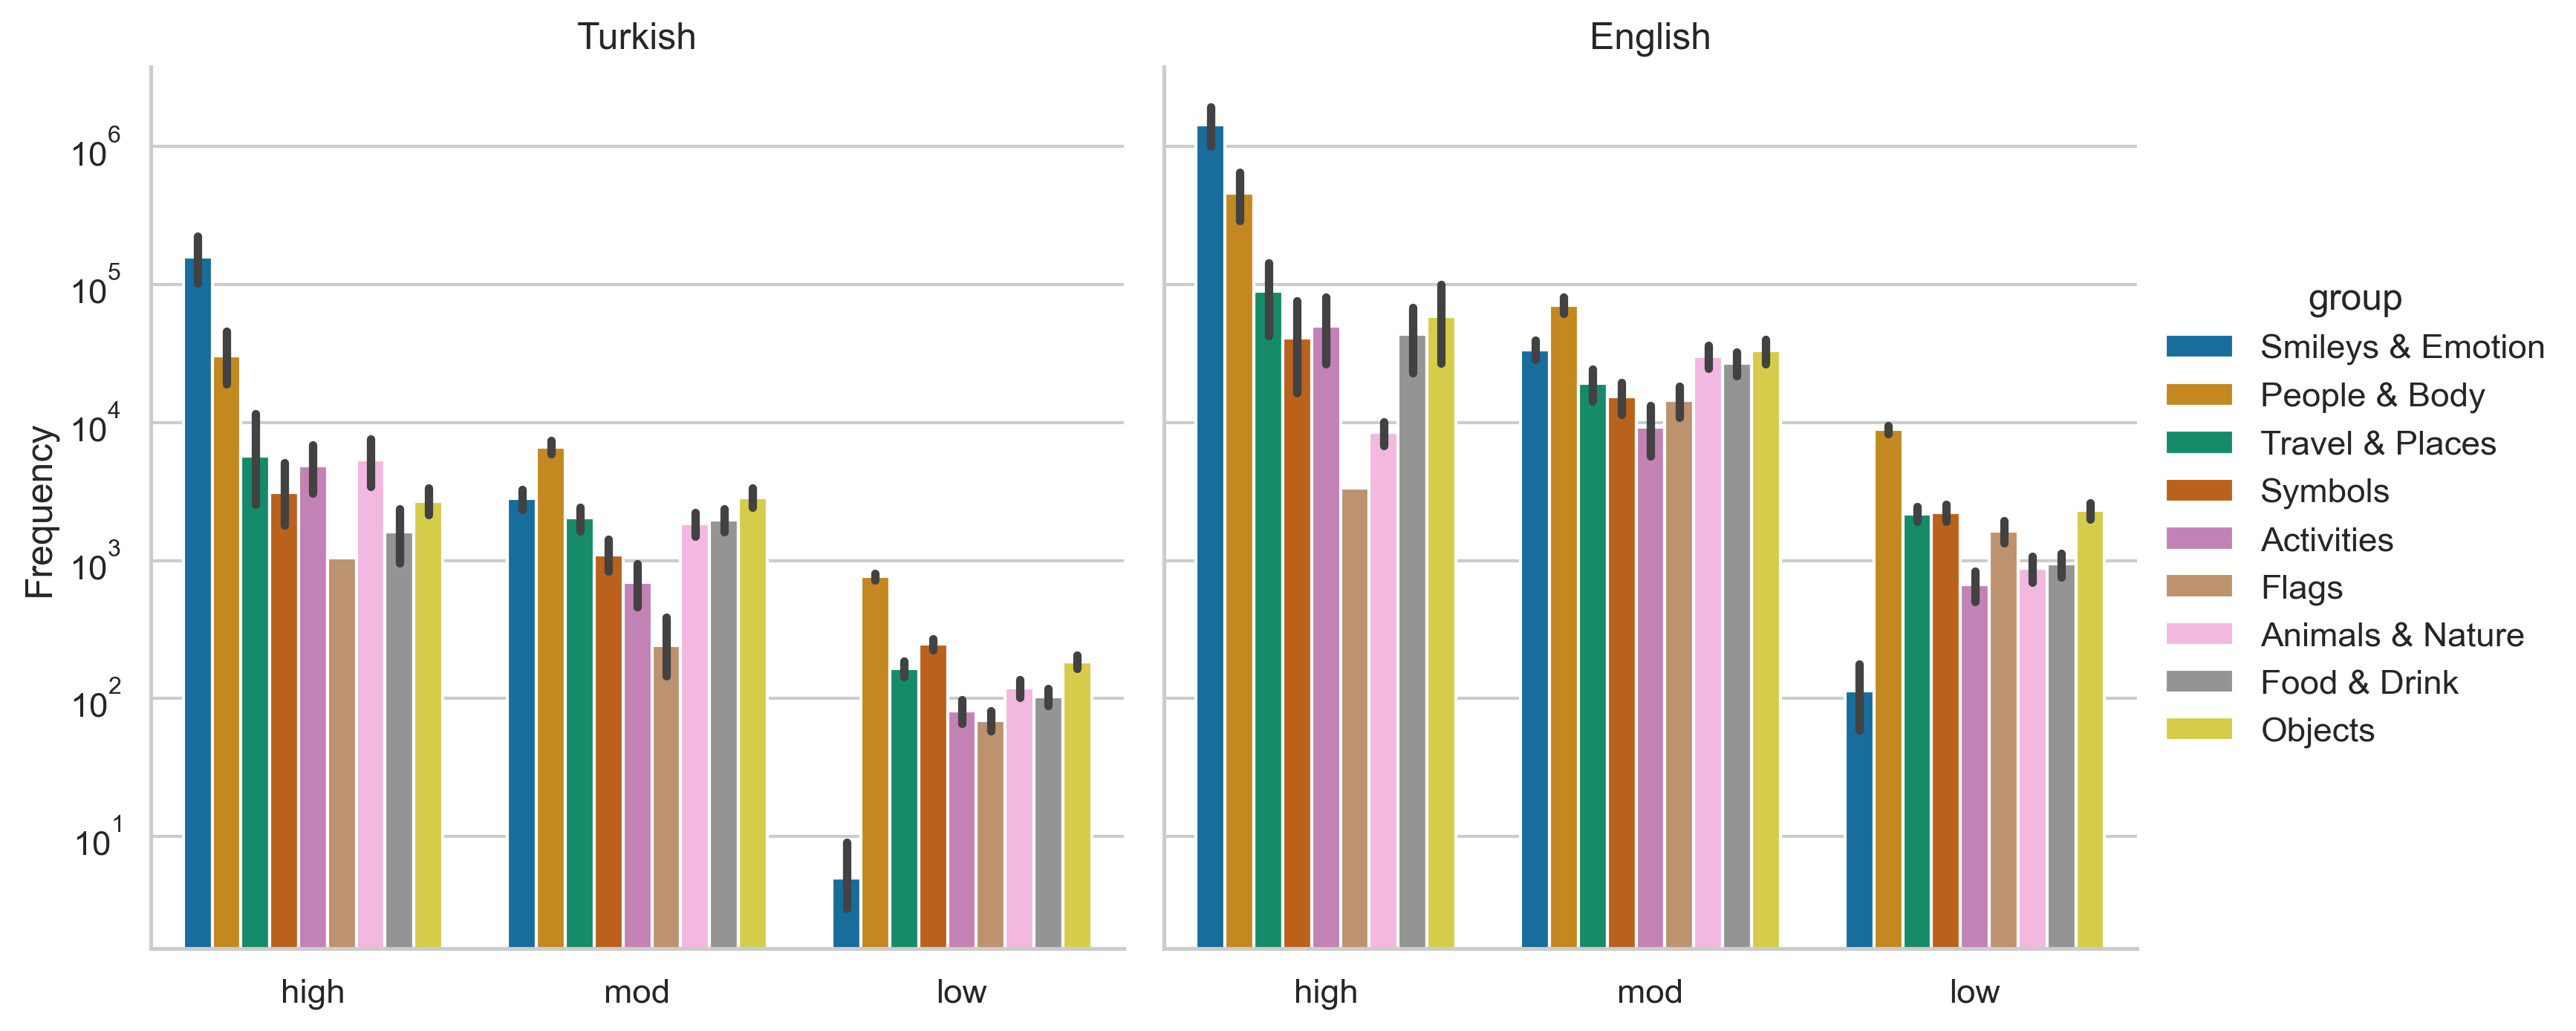

In [90]:

#fig,ax=plt.subplots(figsize=(10,8))
#fig.set_dpi(300)
plt.figure(figsize=(10,8))
sns.set(rc={"figure.figsize":(10, 4),"figure.dpi":300})
sns.set_style('whitegrid')
sns.color_palette("flare",as_cmap=True)

ax = sns.catplot(x='popularity',y='cnt',hue='group',col='lang' ,data=dfAll,kind='bar',estimator=np.sum,palette='colorblind')

ax.fig.get_axes()[0].set_yscale('log')

ax.fig.get_axes()[0].set_title("Turkish")
ax.fig.get_axes()[1].set_title("English")
ax.fig.get_axes()[0].set_ylabel("Frequency")
ax.fig.get_axes()[0].set_xlabel("")
ax.fig.get_axes()[1].set_xlabel("")
plt.show()

##### Overall Jaccard Distance for each Popularity Level

In [103]:
#p0Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<=100]
#p1Tr = groupsAndCountsDfTr[(groupsAndCountsDfTr.index>100) & (groupsAndCountsDfTr.index<=200)]
p1Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<=200]
p2Tr = groupsAndCountsDfTr[(groupsAndCountsDfTr.index>200) & (groupsAndCountsDfTr.index<=1000)]
p3Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index>1000]
p4Tr = groupsAndCountsDfTr[groupsAndCountsDfTr.index>200]

#p0En = groupsAndCountsDfEn[groupsAndCountsDfEn.index<=100]
#p1En = groupsAndCountsDfEn[(groupsAndCountsDfEn.index>100) & (groupsAndCountsDfEn.index<=200)]
p1En = groupsAndCountsDfEn[groupsAndCountsDfEn.index<=200]
p2En = groupsAndCountsDfEn[(groupsAndCountsDfEn.index>200) & (groupsAndCountsDfEn.index<=1000)]
p3En = groupsAndCountsDfEn[groupsAndCountsDfEn.index>1000]
p4En = groupsAndCountsDfEn[groupsAndCountsDfEn.index>200]

#p1Tr['rank'] = p1Tr.index+1
#p1En['rank'] = p1En.index+1

In [110]:
p2En.cnt.max()/p2En.cnt.sum()

0.006044287930769018

In [104]:

#jac_distP0 = 1-len(np.intersect1d(p0Tr.emoticon,p0En.emoticon))/len(np.union1d(p0Tr.emoticon,p0En.emoticon))
jac_distP1 = 1-len(np.intersect1d(p1Tr.emoticon,p1En.emoticon))/len(np.union1d(p1Tr.emoticon,p1En.emoticon))
jac_distP2=1-len(np.intersect1d(p2Tr.emoticon,p2En.emoticon))/len(np.union1d(p2Tr.emoticon,p2En.emoticon))
jac_distP3=1-len(np.intersect1d(p3Tr.emoticon,p3En.emoticon))/len(np.union1d(p3Tr.emoticon,p3En.emoticon))
jac_distP4=1-len(np.intersect1d(p4Tr.emoticon,p4En.emoticon))/len(np.union1d(p4Tr.emoticon,p4En.emoticon))

In [105]:
print(jac_distP1)
print(jac_distP2)
print(jac_distP3)
print(jac_distP4)

0.42352941176470593
0.49056603773584906
0.6451612903225806
0.38106698756518254


#### Jaccard Distance by months

In [91]:
dfTr['period']= pd.to_datetime(dfTr.created_at).dt.to_period('M')
dfEn['period']= pd.to_datetime(dfEn.created_at).dt.to_period('M')

grpDataTr = dfTr.groupby(by='period')
grpDataEn = dfEn.groupby(by='period')

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [98]:


X1,X2,X3,X4 = [],[],[],[]
y=[]

for group in grpDataTr:
    indicesTr = grpDataTr.get_group(group[0])
    indicesEn = grpDataEn.get_group(group[0])
    countsTr=pd.DataFrame(cscCountsMatrixTr[indicesTr.index,:].sum(axis=0).T,index=featureNamesArrayTr).sort_values(by=0,ascending=False)
    countsTr.rename(columns={0:'cnt'},inplace=True)
    
    countsTr['rank_'] = countsTr.reset_index().index
    
    countsEn=pd.DataFrame(cscCountsMatrixEn[indicesEn.index,:].sum(axis=0).T,index=featureNamesArrayEn).sort_values(by=0,ascending=False)
    countsEn.rename(columns={0:'cnt'},inplace=True)
    countsEn['rank_'] = countsEn.reset_index().index
    

    #p0Tr = countsTr[countsTr.rank_<=100]
    #p1Tr = countsTr[(countsTr.rank_>100) & (countsTr.rank_<=200)]
    p1Tr = countsTr[countsTr.rank_<=200]
    p2Tr = countsTr[(countsTr.rank_>200) & (countsTr.rank_<=1000)]
    p3Tr = countsTr[countsTr.rank_>1000]
    #p4Tr = countsTr[countsTr.rank_>200]

    #p0En = countsEn[countsEn.rank_<=100]
    #p1En = countsEn[(countsEn.rank_>100) & (countsEn.rank_<=200)]
    p1En = countsEn[countsEn.rank_<=200]
    p2En = countsEn[(countsEn.rank_>200) & (countsEn.rank_<=1000)]
    p3En = countsEn[countsEn.rank_>1000]
    #p4En = countsEn[countsEn.rank_>200]

    #jac_distP0 = 1-len(np.intersect1d(p0Tr.index,p0En.index))/len(np.union1d(p0Tr.index,p0En.index))
    jac_distP1 = 1-len(np.intersect1d(p1Tr.index,p1En.index))/len(np.union1d(p1Tr.index,p1En.index))
    jac_distP2=1-len(np.intersect1d(p2Tr.index,p2En.index))/len(np.union1d(p2Tr.index,p2En.index))
    jac_distP3=1-len(np.intersect1d(p3Tr.index,p3En.index))/len(np.union1d(p3Tr.index,p3En.index))
    #jac_distP4=1-len(np.intersect1d(p4Tr.index,p4En.index))/len(np.union1d(p4Tr.index,p4En.index))

    #X0.append(jac_distP0)
    X1.append(jac_distP1)
    X2.append(jac_distP2)
    X3.append(jac_distP3)
    #X4.append(jac_distP4)
    y.append(pd.to_datetime(group[0].strftime('%Y-%m-%d')))
    




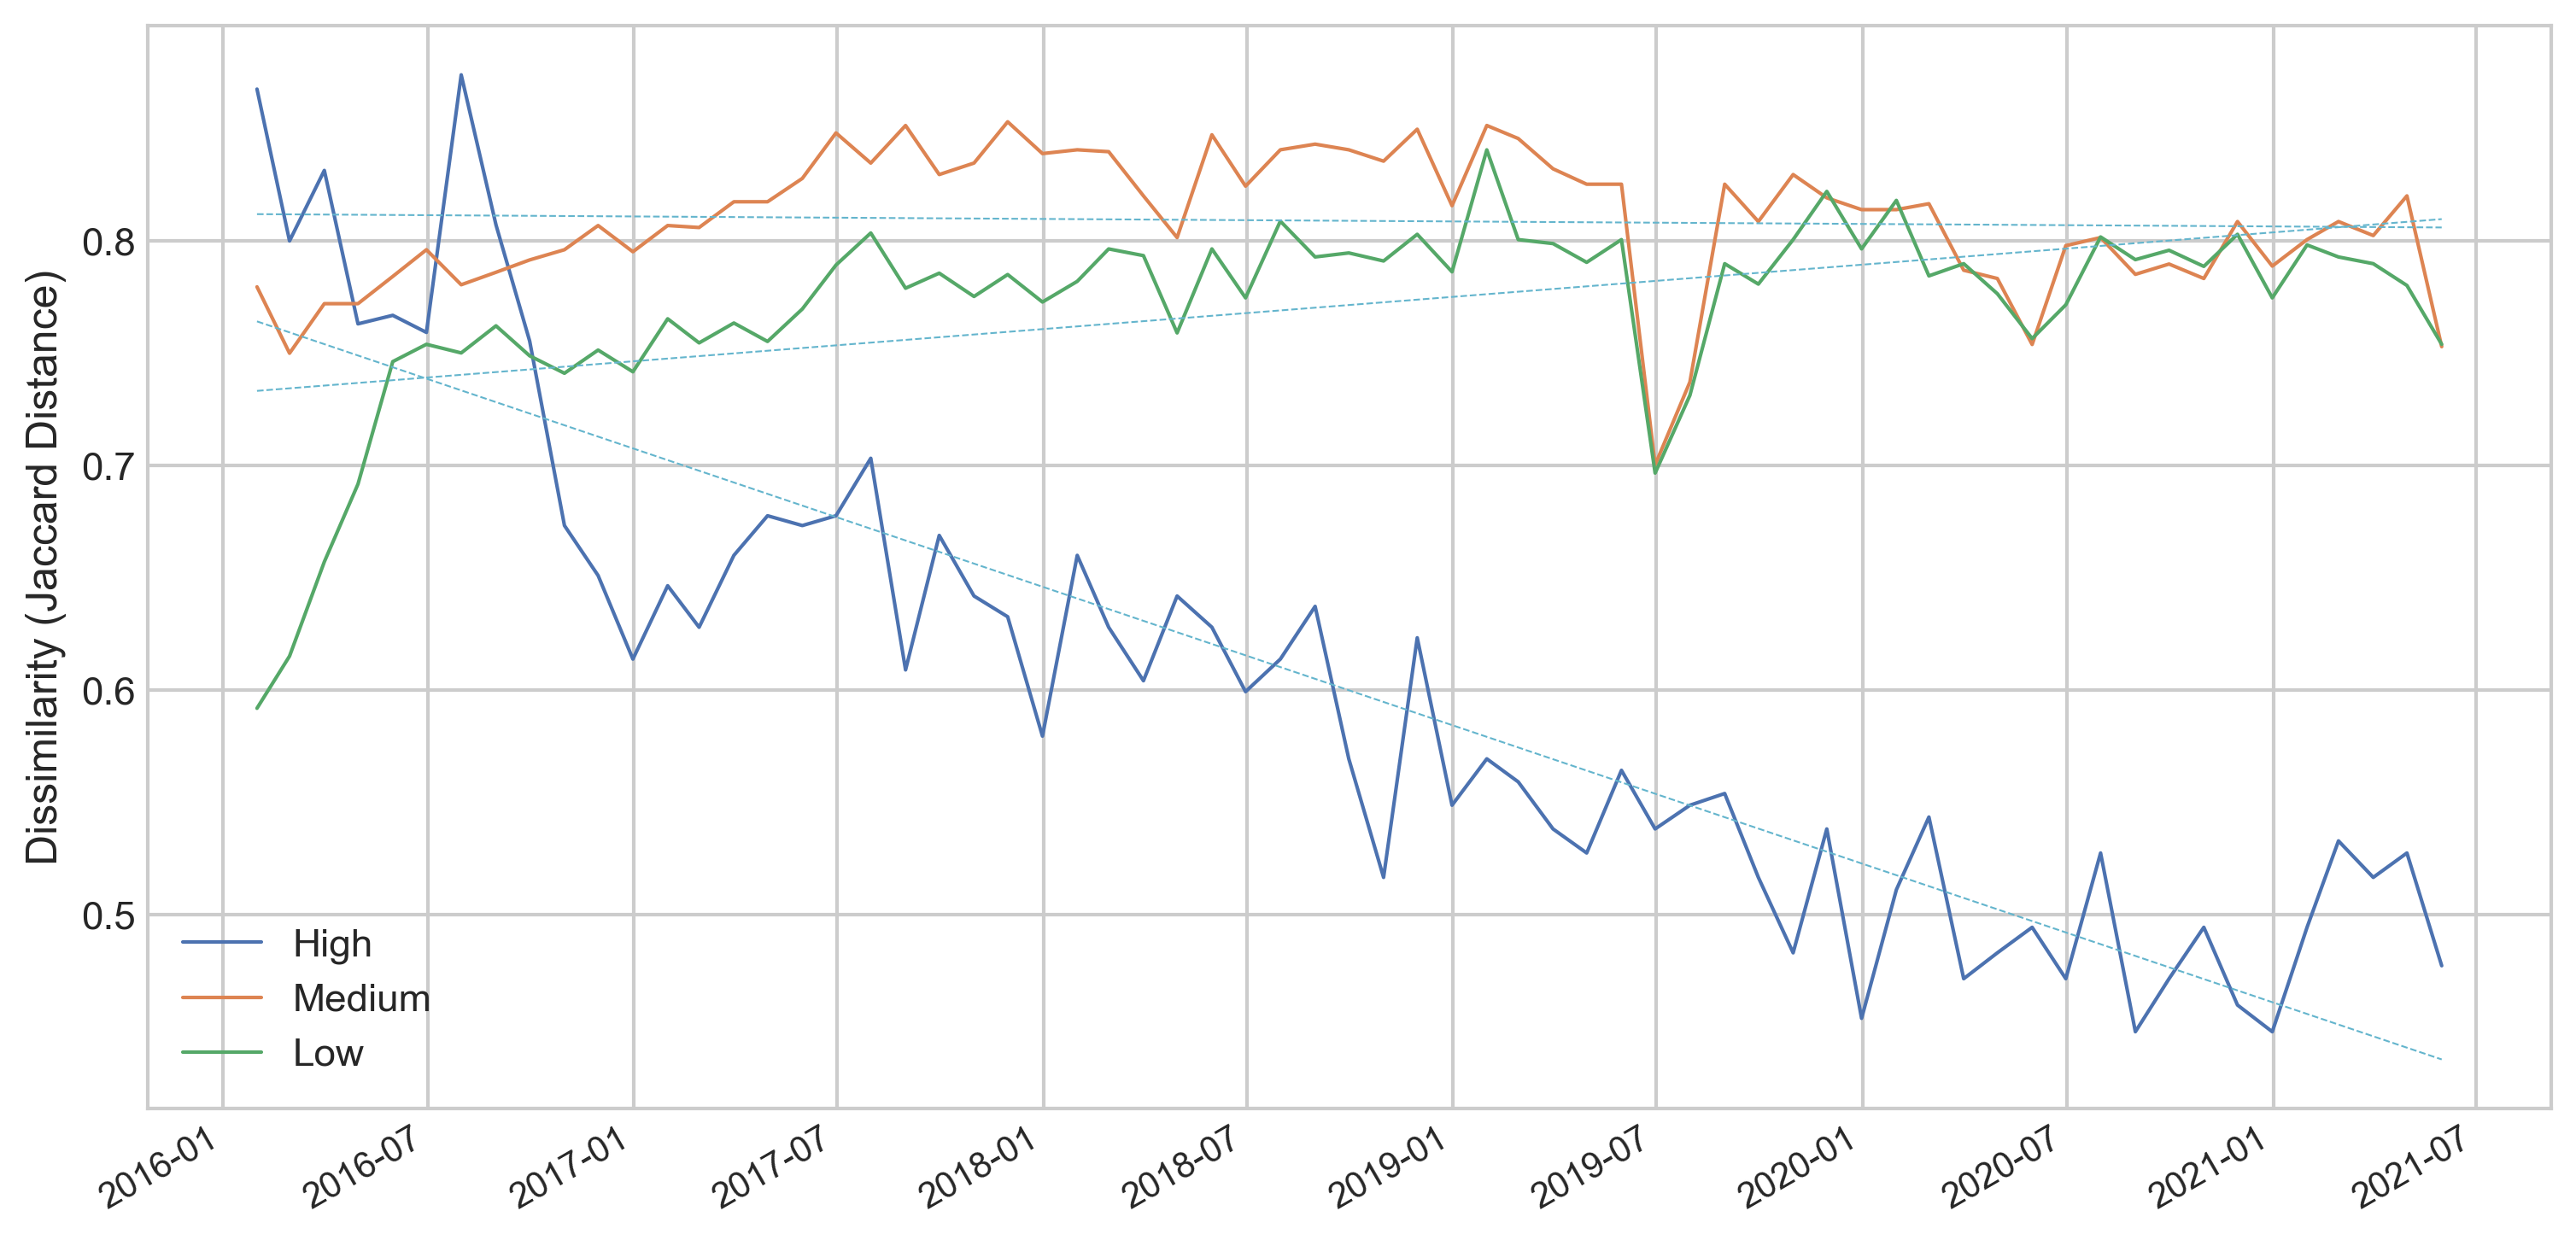

In [100]:
import matplotlib.dates as mdates
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
fig.set_dpi(300)
#ax.plot(y[:-1],X0[:-1],label="Highest")
ax.plot(y[:-1],X1[:-1],label="High",lw=1)
ax.plot(y[:-1],X2[:-1],label="Medium",lw=1)
ax.plot(y[:-1],X3[:-1],label="Low",lw=1)
#ax.plot(y[:-1],X4[:-1],label="SUM",lw=1)

ax.grid(True)
months = mdates.MonthLocator()  # every month
years = mdates.MonthLocator(bymonth=[1,7])
years_fmt = mdates.DateFormatter('%Y-%m')
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
#ax.xaxis.set_minor_formatter(months)
#ax.xaxis.set_major_locator()
#ax.xaxis.set_minor_locator(mdates.MonthLocator())


#ax.axhline(y=np.mean(X1[:-1]),color='b',linestyle='--')
#ax.axhline(y=np.mean(X2[:-1]),color='g',linestyle='--')
#ax.axhline(y=np.mean(X3[:-1]),color='r',linestyle='--')

xNum = mdates.date2num(y[:-1])
z1 = np.polyfit(xNum,X1[:-1], 1)
p1 = np.poly1d(z1)
ax.plot(xNum,p1(xNum),'c--',lw=0.5)

z2 = np.polyfit(xNum,X2[:-1], 1)
p2 = np.poly1d(z2)
ax.plot(xNum,p2(xNum),'c--',lw=0.5)

z3 = np.polyfit(xNum,X3[:-1], 1)
p3 = np.poly1d(z3)
ax.plot(xNum,p3(xNum),'c--',lw=0.5)

#ax.set_title('Distance as a Function of Time')

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.


for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right',fontsize=10)

plt.tight_layout()
plt.ylabel('Dissimilarity (Jaccard Distance)')
plt.legend(loc='best')
plt.show()




In [94]:
from statsmodels.stats.weightstats import ztest as ztest


ztest(X1)

In [66]:
np.mean(np.array(X1))

0.6054340610382052

In [67]:
np.mean(np.array(X2))

0.8086572246456794

In [68]:
np.mean(np.array(X3))

0.7700288724476938

In [24]:
X = xNum - xNum.mean()
Y = p1(xNum) - p1(xNum).mean()

slope = (X.dot(Y)) / (X.dot(X))
print(slope)

-0.0001687844288593144


In [61]:
Y.mean()

7.173748774501012e-17

In [39]:
z3[0]

3.9278951185354594e-05

In [235]:
group[0].strftime('%m-%y')

'06-21'

In [ ]:
group[0].strftime

##### Compare proportions of groups

In [106]:
p1En.sub_group.str.split('-').str[0].value_counts()/200

face             0.385
hand             0.110
person           0.085
emotion          0.080
hands            0.075
food             0.035
sky & weather    0.030
event            0.025
other            0.020
body             0.015
music            0.015
drink            0.010
light & video    0.010
arrow            0.010
animal           0.010
plant            0.010
punctuation      0.010
transport        0.010
time             0.005
monkey           0.005
sport            0.005
clothing         0.005
country          0.005
household        0.005
money            0.005
place            0.005
phone            0.005
game             0.005
cat              0.005
award            0.005
Name: sub_group, dtype: float64

In [97]:
p1Tr.sub_group .value_counts()/200

emotion                   0.100
face-concerned            0.080
face-smiling              0.065
hands                     0.055
sky & weather             0.045
person-gesture            0.045
face-neutral-skeptical    0.040
hand-fingers-closed       0.035
light & video             0.035
event                     0.030
face-affection            0.030
hand-single-finger        0.030
face-negative             0.025
face-tongue               0.025
face-unwell               0.025
other-symbol              0.025
plant-flower              0.025
hand-fingers-partial      0.020
face-sleepy               0.020
food-prepared             0.020
face-hand                 0.020
punctuation               0.015
plant-other               0.015
clothing                  0.015
body-parts                0.015
animal-mammal             0.015
face-glasses              0.015
hand-fingers-open         0.010
person-activity           0.010
game                      0.010
arrow                     0.010
drink   

In [87]:
p1Tr.group.value_counts()/200

Smileys & Emotion    0.460
People & Body        0.220
Objects              0.070
Travel & Places      0.060
Animals & Nature     0.060
Symbols              0.050
Activities           0.050
Food & Drink         0.030
Flags                0.005
Name: group, dtype: float64

In [79]:
p1En.group.value_counts()/200

Smileys & Emotion    0.475
People & Body        0.285
Travel & Places      0.050
Objects              0.045
Food & Drink         0.045
Symbols              0.040
Activities           0.040
Animals & Nature     0.020
Flags                0.005
Name: group, dtype: float64

In [90]:
p2Tr.group.value_counts()/1000

People & Body        0.289
Objects              0.116
Travel & Places      0.100
Food & Drink         0.072
Animals & Nature     0.065
Smileys & Emotion    0.057
Symbols              0.055
Activities           0.030
Flags                0.016
Name: group, dtype: float64

In [93]:
(len(p3Tr))

839

In [94]:
p3Tr.group.value_counts()/len(p3Tr)

People & Body        0.454112
Symbols              0.164482
Objects              0.091776
Travel & Places      0.090584
Animals & Nature     0.054827
Food & Drink         0.050060
Flags                0.046484
Activities           0.044100
Smileys & Emotion    0.003576
Name: group, dtype: float64